# Training convnets on small datasets

In [12]:
import os, shutil

In [13]:
original_dataset_dir = '/home/amos/Desktop/Models/dogs-vs-cats/train/'
base_dir = '/home/amos/Desktop/Models/cats_and_dogs_small' # Directory where the smaller dataset will be stored
os.mkdir(base_dir)


In [14]:
# Directories for training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


In [15]:
train_cats_dir = os.path.join(train_dir, 'cats') # Directory with training cat pictures
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with training dog pictures
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with validation cat pictures
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') # Directory with validation dog pictures
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') # Directory with test cat images
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') # Directory with test dog images
os.mkdir(test_dogs_dir)

In [16]:
# Copy the first 1000 cat images to train_cats dir
fnames = ['cat.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#copy the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
# Copy the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
# Lets check how many images in each split
print('total training cat images : ', len(os.listdir(train_cats_dir)))
print('total validation cat images : ', len(os.listdir(validation_cats_dir)))
print('total test cat images : ', len(os.listdir(test_cats_dir)))
print('=============================================================')
print('total training dog images : ', len(os.listdir(train_dogs_dir)))
print('total validation dog images : ', len(os.listdir(validation_dogs_dir)))
print('total test dog images : ', len(os.listdir(test_dogs_dir)))

total training cat images :  1000
total validation cat images :  500
total test cat images :  500
total training dog images :  1000
total validation dog images :  500
total test dog images :  500


# Building the network

In [19]:
from keras import models
from keras import layers


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


2023-02-05 09:56:36.492117: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 09:56:36.492807: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-05 09:56:36.492940: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-05 09:56:36.493047: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-05 09:56:36.493152: W tensorflow/c

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [22]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ['acc'])

# Data preprocessing

In [23]:
# Steps of getting the pictures from the drive to our network include:
# 1. read the picture files
# 2. Decode the JPEG files content to RGB grids of pixels
# 3. Convert these into floating-point tensors
# 4. Rescale the pixel values (between  0 and 255) to the [0, 1] interval. Neural network prefer small input values


In [24]:
from keras.preprocessing.image import ImageDataGenerator


In [25]:
train_datagen = ImageDataGenerator(rescale=1./255) # Rescales all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), 
                                                    batch_size = 20, class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), 
                                                        batch_size = 20, class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30,
                              validation_data = validation_generator, validation_steps = 30)
model.save('cats_and_dogs_small_1.h5') # it is always good practice to save your models after training

/tmp/ipykernel_81229/2325827428.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30,


Epoch 1/30
100/100 [==============================] - 32s 306ms/step - loss: 0.6948 - acc: 0.5245 - val_loss: 0.6694 - val_acc: 0.5733
Epoch 2/30
100/100 [==============================] - 35s 351ms/step - loss: 0.6504 - acc: 0.6125 - val_loss: 0.6493 - val_acc: 0.5733
Epoch 3/30
100/100 [==============================] - 35s 347ms/step - loss: 0.5954 - acc: 0.6800 - val_loss: 0.6109 - val_acc: 0.6533
Epoch 4/30
100/100 [==============================] - 35s 352ms/step - loss: 0.5575 - acc: 0.7195 - val_loss: 0.6137 - val_acc: 0.6617
Epoch 5/30
100/100 [==============================] - 35s 348ms/step - loss: 0.5354 - acc: 0.7280 - val_loss: 0.6032 - val_acc: 0.6717
Epoch 6/30
100/100 [==============================] - 34s 343ms/step - loss: 0.5045 - acc: 0.7435 - val_loss: 0.5951 - val_acc: 0.6767
Epoch 7/30
100/100 [==============================] - 34s 342ms/step - loss: 0.4808 - acc: 0.7780 - val_loss: 0.5400 - val_acc: 0.7283
Epoch 8/30
100/100 [==============================] - 3

In [27]:
# Lets plot the loss and accuracy of the model over the training and validation data during training

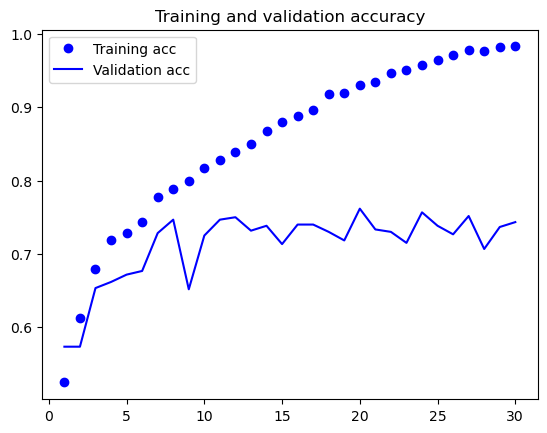

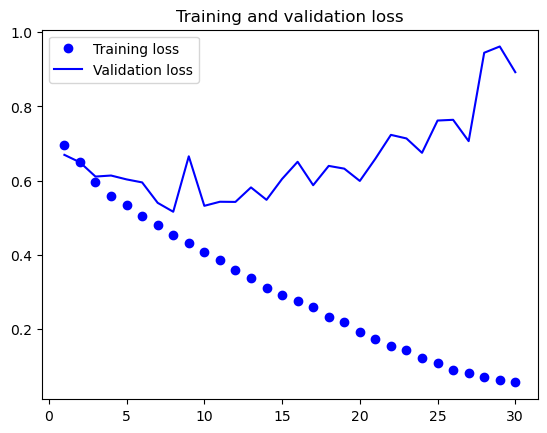

In [28]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
# Use Augmentation to reduce overfitting
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, 
                             height_shift_range = 0.2, shear_range = 0.2, 
                             zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

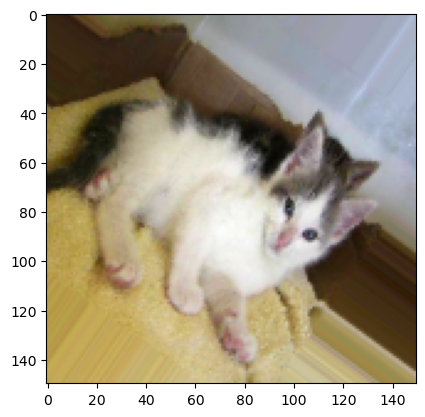

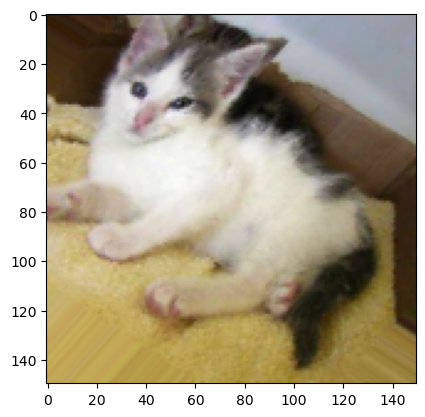

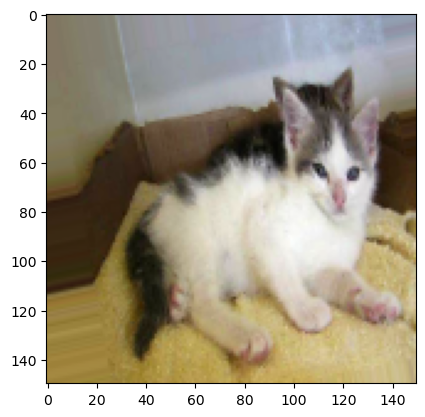

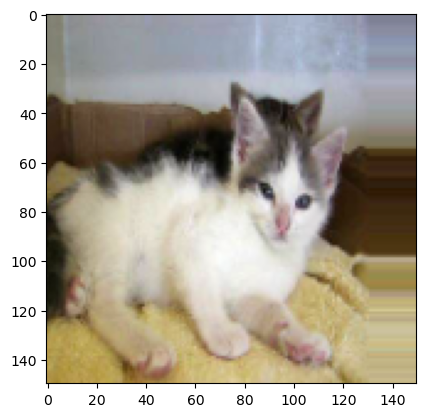

In [36]:
import keras.utils as image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] # Choose one image to augment
img = image.load_img(img_path, target_size = (150, 150)) # Reads the image and resizes it. 
x = image.img_to_array(img) # Converts the image into a numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Reshapes it to (1, 150, 150, 3)

i = 0

# Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Defining a new convnet that includes dropout

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, 
                                   width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) # Note: validation data should not be augmented
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150),
                                                    batch_size = 20, class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), 
                                                        batch_size = 20, class_mode = 'binary')
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, 
                              validation_data = validation_generator, validation_steps = 30)
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


/tmp/ipykernel_81229/1495873288.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30,


100/100 [==============================] - 32s 320ms/step - loss: 0.5165 - acc: 0.7345 - val_loss: 0.5196 - val_acc: 0.7417
Epoch 2/30
100/100 [==============================] - 36s 355ms/step - loss: 0.4998 - acc: 0.7550 - val_loss: 0.4888 - val_acc: 0.7700
Epoch 3/30
100/100 [==============================] - 36s 361ms/step - loss: 0.5042 - acc: 0.7430 - val_loss: 0.4760 - val_acc: 0.7700
Epoch 4/30
100/100 [==============================] - 44s 439ms/step - loss: 0.5016 - acc: 0.7445 - val_loss: 0.4520 - val_acc: 0.7967
Epoch 5/30
100/100 [==============================] - 46s 456ms/step - loss: 0.5011 - acc: 0.7605 - val_loss: 0.5124 - val_acc: 0.7417
Epoch 6/30
100/100 [==============================] - 46s 455ms/step - loss: 0.4920 - acc: 0.7570 - val_loss: 0.4685 - val_acc: 0.7717
Epoch 7/30
100/100 [==============================] - 46s 460ms/step - loss: 0.4781 - acc: 0.7700 - val_loss: 0.4588 - val_acc: 0.7733
Epoch 8/30
100/100 [==============================] - 45s 454ms/st

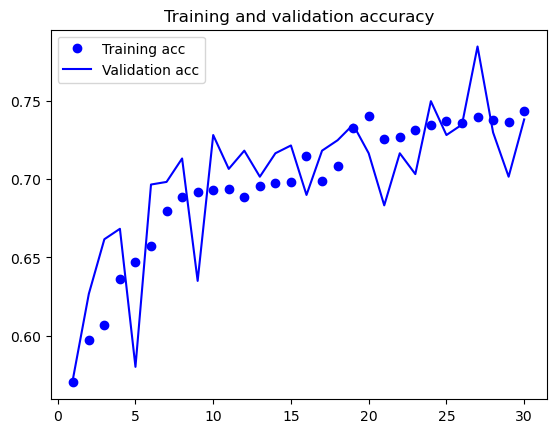

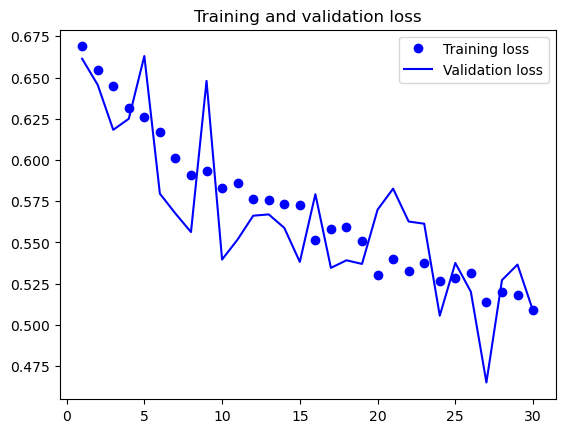

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Using a pretrained network

In [1]:
from keras.applications import VGG16

2023-02-06 22:12:33.105512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-06 22:12:36.767180: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-06 22:12:36.767256: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-06 22:12:43.783336: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

2023-02-06 22:13:28.947363: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 22:13:28.947723: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-06 22:13:28.947803: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-06 22:13:28.947865: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-06 22:13:28.947958: W tensorflow/c

58889256/58889256 [==============================] - 863s 15us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


In [9]:
base_dir = '/home/amos/Desktop/Models/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20


In [11]:
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory, target_size = (150, 150), 
                                            batch_size = batch_size, class_mode = 'binary')
    i = 0
    for input_batch, labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
        

In [20]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


In [21]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


In [22]:
from keras import models
from keras import layers
from keras import optimizers


In [23]:
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(train_features, train_labels, epochs = 30, batch_size = 20, 
                    validation_data = (validation_features, validation_labels))


Epoch 1/30
100/100 [==============================] - 2s 18ms/step - loss: 0.6253 - acc: 0.6475 - val_loss: 0.4530 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 1s 14ms/step - loss: 0.4435 - acc: 0.7895 - val_loss: 0.3679 - val_acc: 0.8680
Epoch 3/30
100/100 [==============================] - 1s 13ms/step - loss: 0.3613 - acc: 0.8440 - val_loss: 0.3260 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 1s 13ms/step - loss: 0.3220 - acc: 0.8650 - val_loss: 0.3040 - val_acc: 0.8790
Epoch 5/30
100/100 [==============================] - 1s 14ms/step - loss: 0.2913 - acc: 0.8790 - val_loss: 0.2830 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2687 - acc: 0.8895 - val_loss: 0.2892 - val_acc: 0.8760
Epoch 7/30
100/100 [==============================] - 1s 14ms/step - loss: 0.2484 - acc: 0.8985 - val_loss: 0.2656 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 1s 14ms/step - 

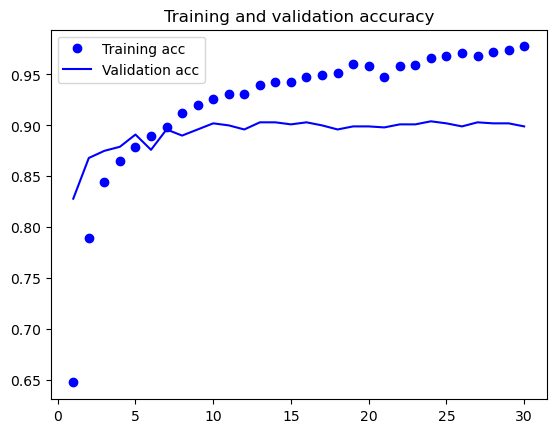

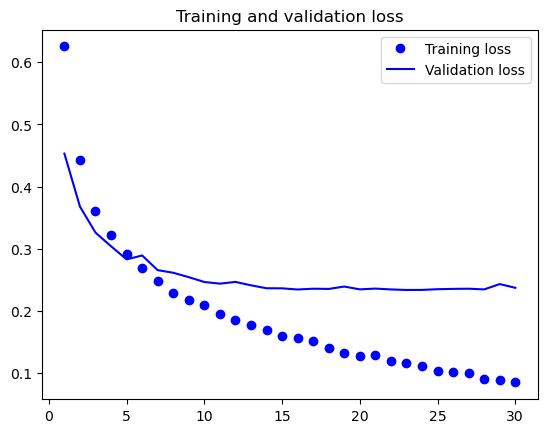

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
